# Metody esploracji danych

## Lab nr. 1 and 2

In [1]:
# Import libraries
import os
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Define paths
train_data_path = Path(os.getcwd()).parent / 'data' / 'fb_data_train.csv'
test_data_path = Path(os.getcwd()).parent / 'data' / 'fb_data_test.csv'

In [3]:
# Load data
train_df = pd.read_csv(train_data_path, index_col='Rok')
test_df = pd.read_csv(test_data_path, index_col='Rok')

## Look at the data

In [5]:
train_df.head()

,Przych,Zysk,Zatr,User
Rok,,,,
2008,272,-56,850,148
2009,777,229,1218,360
2010,1974,606,2127,608
2011,3711,1000,3200,845
2012,5089,53,4619,1056


In [6]:
test_df.head()

,Przych,Zysk,Zatr,User
Rok,,,,
2018,55838,22112,39094,2255
2019,70697,18485,50064,2434
2020,85965,29146,63615,2710
2021,117929,39370,77412,2892


In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, 2008 to 2017
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Przych  10 non-null     int64
 1   Zysk    10 non-null     int64
 2   Zatr    10 non-null     int64
 3   User    10 non-null     int64
dtypes: int64(4)
memory usage: 400.0 bytes


In [8]:
train_df.describe()

,Przych,Zysk,Zatr,User
count,10.000000,10.000000,10.000000,10.000000
mean,11838.000000,3611.100000,8239.400000,1121.800000
std,13325.704351,5310.362814,7931.401518,644.457705
min,272.000000,-56.000000,850.000000,148.000000
25%,2408.250000,323.250000,2395.250000,667.250000
50%,6480.500000,1250.000000,5478.000000,1142.000000
75%,16562.500000,3501.000000,11818.000000,1541.500000
max,40653.000000,15934.000000,25105.000000,2129.000000


## Plots

<Axes: xlabel='Rok'>

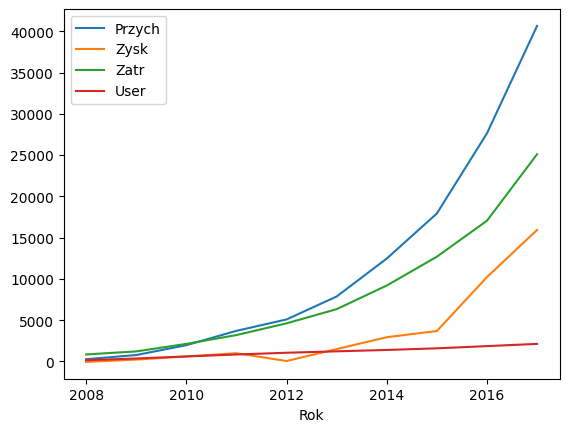

In [9]:
train_df.plot()

<Axes: xlabel='Rok'>

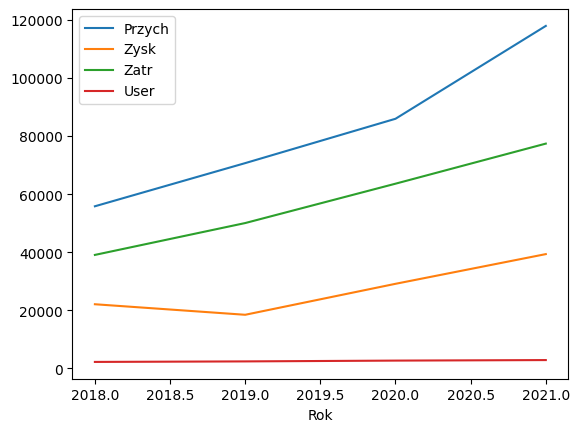

In [12]:
test_df.plot()

array([<Axes: xlabel='Rok'>, <Axes: xlabel='Rok'>, <Axes: xlabel='Rok'>,
       <Axes: xlabel='Rok'>], dtype=object)

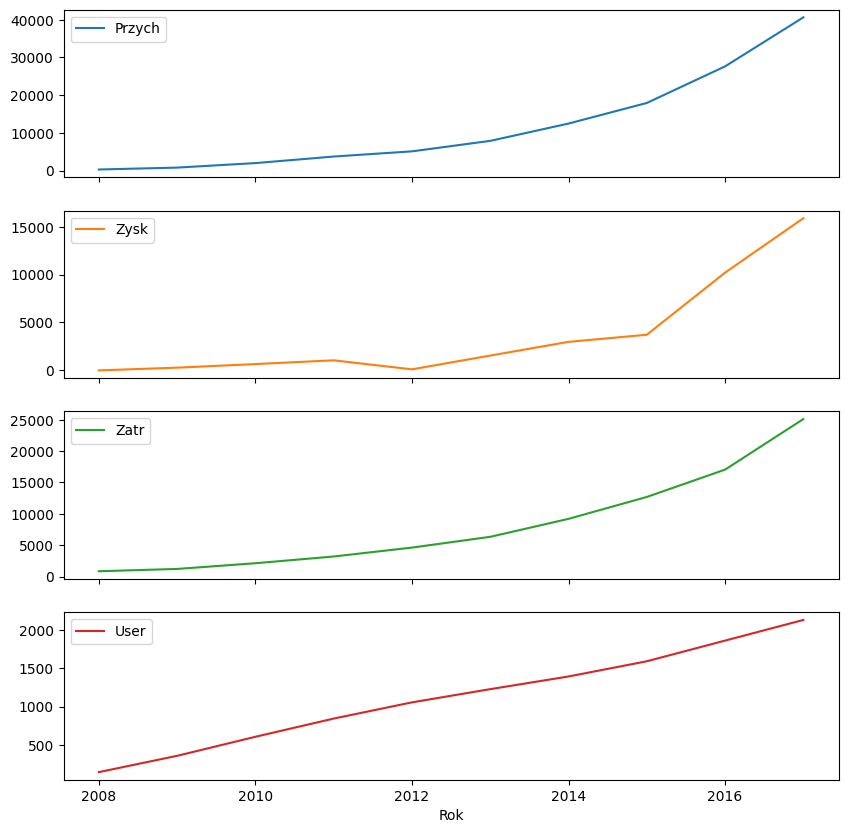

In [13]:
train_df.plot(subplots=True, figsize=(10, 10))

## Distribution

array([[<Axes: title={'center': 'Przych'}>,
        <Axes: title={'center': 'Zysk'}>],
       [<Axes: title={'center': 'Zatr'}>,
        <Axes: title={'center': 'User'}>]], dtype=object)

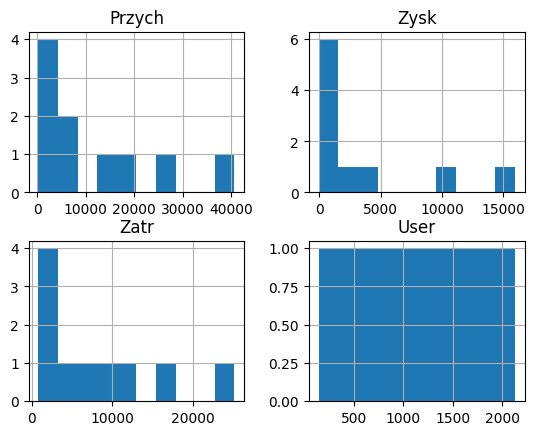

In [14]:
train_df.hist()

Przych       Axes(0.125,0.53;0.352273x0.35)
Zysk      Axes(0.547727,0.53;0.352273x0.35)
Zatr         Axes(0.125,0.11;0.352273x0.35)
User      Axes(0.547727,0.11;0.352273x0.35)
dtype: object

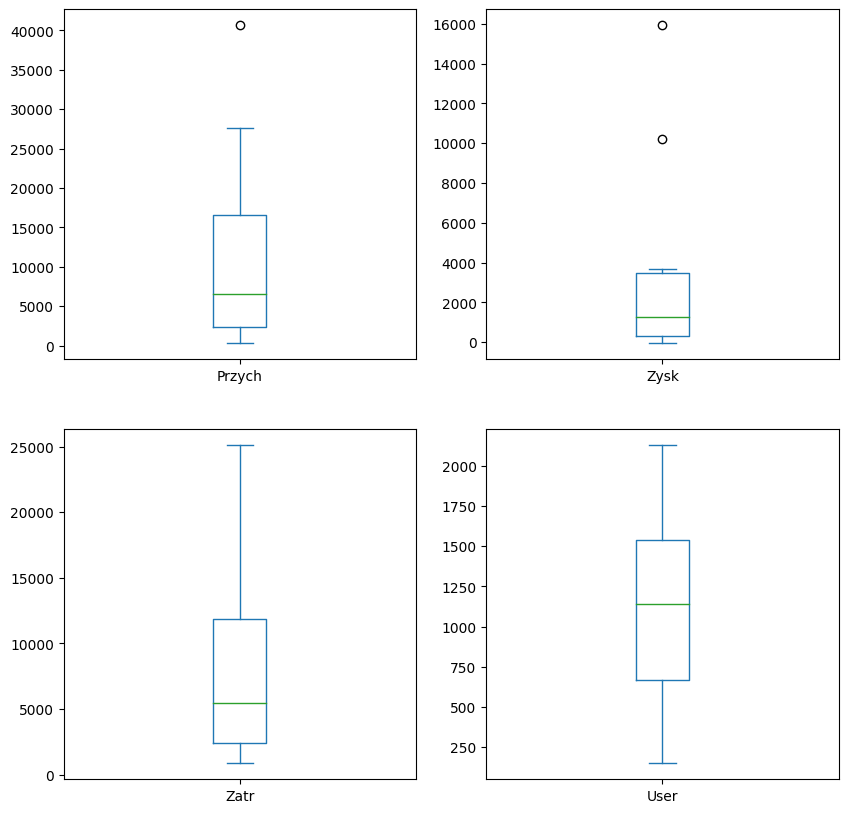

In [15]:
train_df.plot(kind='box', subplots=True, layout=(2, 2), sharex=False, sharey=False, figsize=(10, 10))

## Correlation

<Axes: >

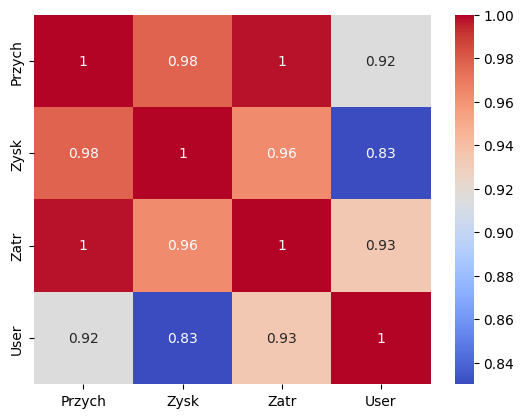

In [16]:
corr = train_df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')

# Modele

## Linear regression

Simple linear regression for one independent variable (users) and one dependent variable (incone).

In [6]:
from sklearn.linear_model import LinearRegression

In [6]:
X_train = train_df["User"].values.reshape(-1, 1)
y_train = train_df["Przych"].values.reshape(-1, 1)
X_test = test_df["User"].values.reshape(-1, 1)
y_test = test_df["Przych"].values.reshape(-1, 1)

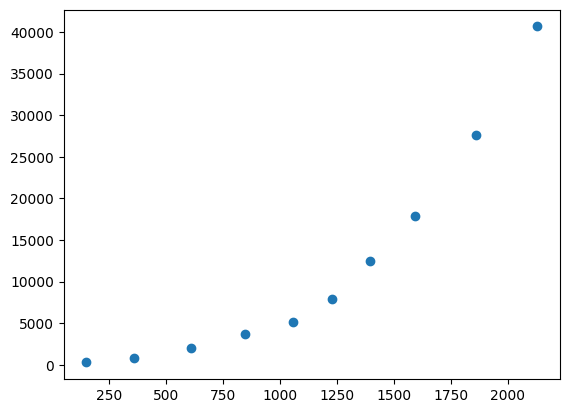

In [30]:
plt.scatter(X_train, y_train)

In [7]:
linear_regression = LinearRegression()
linear_regression.fit(X_train, y_train)

LinearRegression()

### Plot linear regression

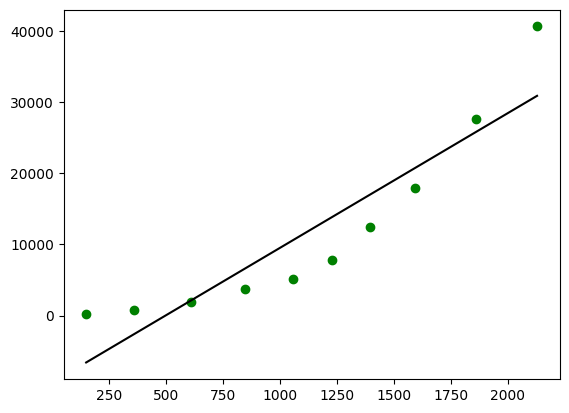

In [34]:
# Plot the data and the model prediction
plt.scatter(X_train, y_train, color='g')
plt.plot(X_train, linear_regression.predict(X_train), color='k')

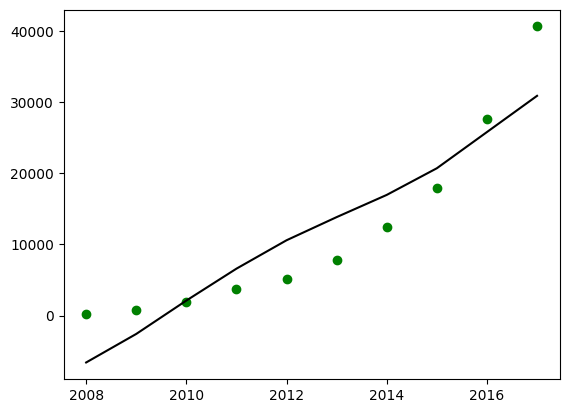

In [38]:
# Plot the data where x axis is year and y axis is the income
plt.scatter(train_df.index, y_train, color='g')
plt.plot(train_df.index, linear_regression.predict(X_train), color='k')

## Predictions

In [41]:
y_pred = linear_regression.predict(X_test)

In [44]:
for i in range(len(y_pred)):
    print(f"Prediction for year {test_df.index[i]}: {y_pred[i][0]:.2f} $ (actual: {y_test[i][0]:.2f} $)")

Prediction for year 2018: 33284.79 $ (actual: 55838.00 $)
Prediction for year 2019: 36672.52 $ (actual: 70697.00 $)
Prediction for year 2020: 41896.06 $ (actual: 85965.00 $)
Prediction for year 2021: 45340.56 $ (actual: 117929.00 $)


### Plot predictions

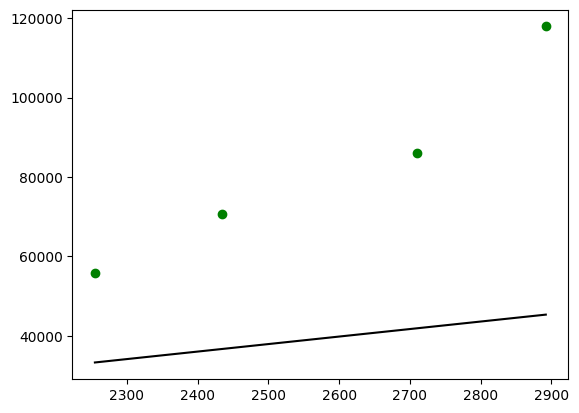

In [46]:
# Plot the test data and the model prediction
plt.scatter(X_test, y_test, color='g')
plt.plot(X_test, linear_regression.predict(X_test), color='k')

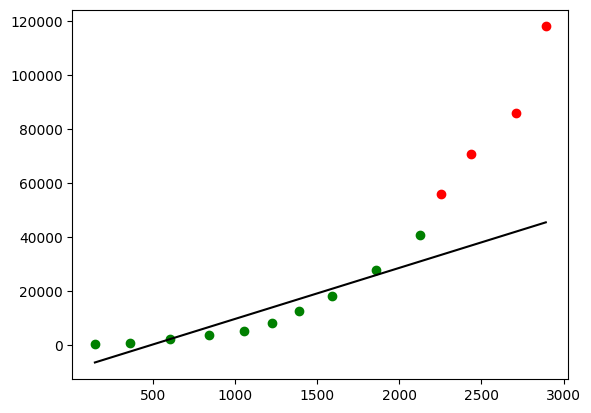

In [48]:
# Plot train and test data
X = np.concatenate((X_train, X_test))
plt.scatter(X_train, y_train, color='g')
plt.scatter(X_test, y_test, color='r')
plt.plot(X, linear_regression.predict(X), color='k')

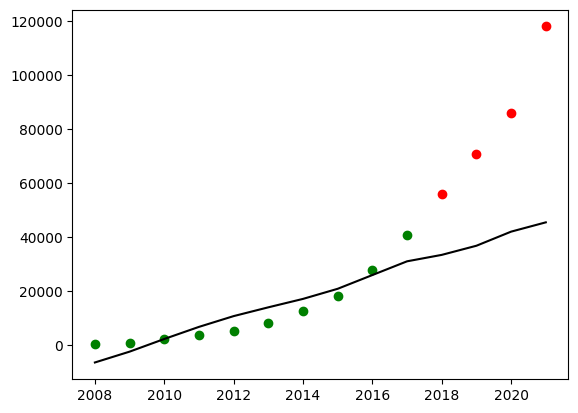

In [54]:
# Plot train and test data with years on x axis
train_test_df = pd.concat([train_df, test_df])
X = np.concatenate((X_train, X_test))
plt.scatter(train_df.index, y_train, color='g')
plt.scatter(test_df.index, y_test, color='r')
plt.plot(train_test_df.index, linear_regression.predict(X), color='k')

### Look at the model coefficients

In [8]:
# Print linear regression equation
print(f"Linear regression equation: y = {linear_regression.coef_[0][0]:.2f} * x + {linear_regression.intercept_[0]:.2f}")

Linear regression equation: y = 18.93 * x + -9393.03


## Multiple linear regression

Multiple linear regression is for more than one independent variable (Zysk, Zatr, User) and one dependent variable (Przych).

In [4]:
# Prepare data for multiple linear regression
X_train = train_df.drop("Przych", axis=1)
y_train = train_df["Przych"].values.reshape(-1, 1)
X_test = test_df.drop("Przych", axis=1)
y_test = test_df["Przych"].values.reshape(-1, 1)

In [8]:
# Fit the model
multiple_linear_regression = LinearRegression()
multiple_linear_regression.fit(X_train, y_train)

LinearRegression()

### Plot multiple linear regression

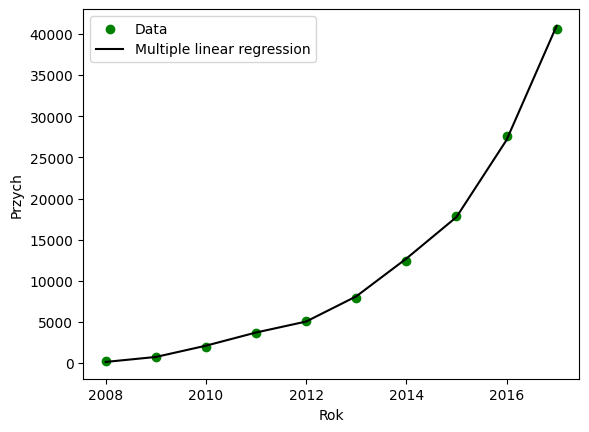

In [9]:
# Plot multiple linear regression equation with train data
plt.scatter(train_df.index, y_train, color='g')
plt.plot(train_df.index, multiple_linear_regression.predict(X_train), color='k')
plt.xlabel('Rok')
plt.ylabel('Przych')
plt.legend(['Data', 'Multiple linear regression'])
plt.show()

### Predictions

In [10]:
y_pred = multiple_linear_regression.predict(X_test)

In [11]:
for i in range(len(y_pred)):
    print(f"Prediction for year {test_df.index[i]}: {y_pred[i][0]:.2f} $ (actual: {y_test[i][0]:.2f} $)")

Prediction for year 2018: 63073.78 $ (actual: 55838.00 $)
Prediction for year 2019: 75733.75 $ (actual: 70697.00 $)
Prediction for year 2020: 99678.27 $ (actual: 85965.00 $)
Prediction for year 2021: 123733.11 $ (actual: 117929.00 $)
